# Human Activity Recognition Data Exploratory Data Analysis

## Import Necessary Libraries

In [1]:
## Import necessary libraries
from urllib.parse import quote

## Import necessary API
import sys
sys.path.append('../../../../')
from api.v2.util.data_load import data_load
from api.v2.util.get_tag_name import show_column
from api.v2.eda.Data_Info import Data_Info
from api.v2.eda.Statistical_test import adf_test, kpss_test, pp_test, ljung_box_test, arch_test, vif_test
from api.v2.eda.Visualize_EDA import Visualize_EDA

## Set Human Activity Recognition Data Base Parameter

In [ ]:
# Set Human Activity Recognition Data Base Parameter

# Set MachBase Neo URL address
URL = 'http://127.0.0.1:5654'
# Set Tag Table Name
table = 'activity'
# Set TimeFormat - > 'default' or '2006-01-02 15:04:05.000000'(Divided down to the nanosecond)
timeformat = 'Default'
# Set resample Option -> D(day), H(hour), T(minute), S(second)
resample_freq = None

## Check Human Activity Recognition Data Info

In [ ]:
# Print Human Activity Recognition DataInfo
Data_Info(URL, table, timeformat, resample_freq)

Tag List: ['Activity', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6']
--------------------------------------------
Number of data: 6461328
--------------------------------------------
Start Time: 2025-02-24 00:00:00
End Time: 2037-06-08 00:47:00
--------------------------------------------
Missing Values: 0
--------------------------------------------
Smallest time interval: 60.00 seconds
Largest time interval: 60.00 seconds
--------------------------------------------
Maximum sampling rate (per second): 0.016666666666666666 Hz
--------------------------------------------


## Set Human Activity Recognition Data Extra Parmeter
* Set based on the information confirmed in the previous step

In [4]:
# Set the desired tag names
tags = show_column(URL, table)
# Wrap each item in the list with single quotes and separate with commas
tags_ = ",".join(f"'{tag}'" for tag in tags)
# Set Tag Name
name = quote(tags_, safe=":/")
# Set Start time
start_time = '2025-02-24 00:00:00'
# Set End time 
end_time = '2037-06-08 00:47:00'
# Set TimeFormat - > 'default' or quote('2006-01-02 15:04:05.000000')(Divided down to the nanosecond)
timeformat = 'default'

In [5]:
# Human Activity Recognition Data Load
df = data_load(URL, table, name, start_time, end_time, timeformat, resample_freq)

In [6]:
df

NAME,Activity,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
TIME,,,,,,,
2025-02-24 00:00:00,0.0,-0.901980,0.013708,0.541544,-1.079954,0.113521,0.144795
2025-02-24 00:01:00,0.0,-0.972077,0.053302,0.503752,-1.266491,0.012782,0.136284
2025-02-24 00:02:00,0.0,-1.008416,0.013308,0.484302,-1.336297,-0.053922,0.073320
2025-02-24 00:03:00,0.0,-1.041245,0.036321,0.479578,-1.291301,0.132370,0.058046
2025-02-24 00:04:00,0.0,-1.048913,0.028568,0.467828,-1.307763,0.446462,0.040277
...,...,...,...,...,...,...,...
2037-06-08 00:43:00,2.0,-1.028311,-0.001951,0.000414,-1.004302,0.028621,-0.080702
2037-06-08 00:44:00,2.0,-1.032170,0.013994,-0.000395,-0.988862,0.018858,-0.079051
2037-06-08 00:45:00,2.0,-1.030855,0.015393,0.000422,-0.994323,0.024769,-0.080680


## Check Visualize_EDA

Start Visualize All Method
Removed NaN Columns: set()


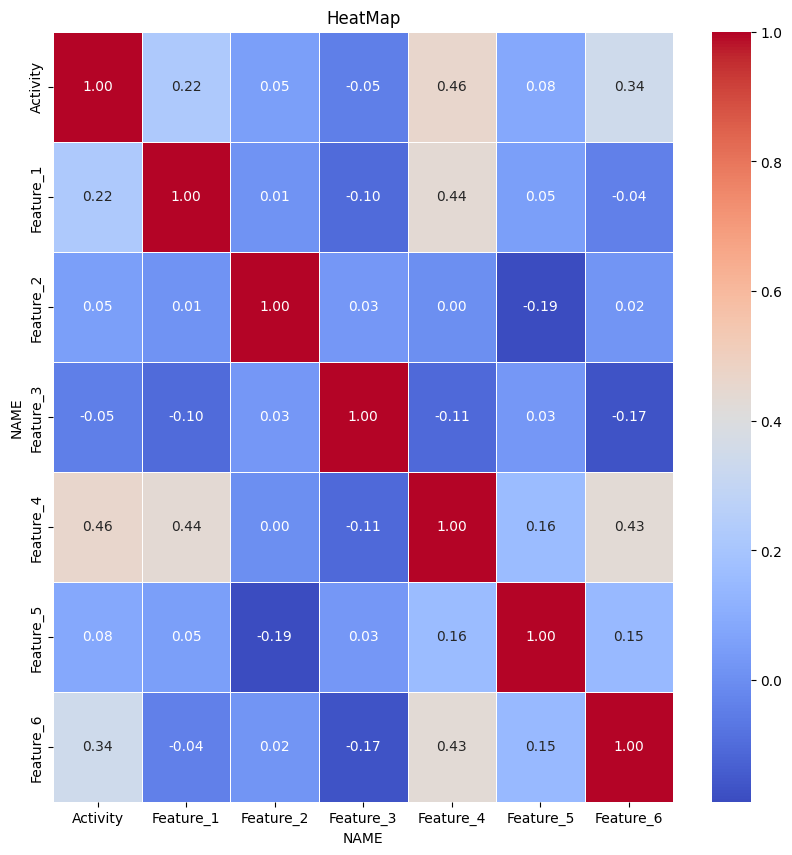

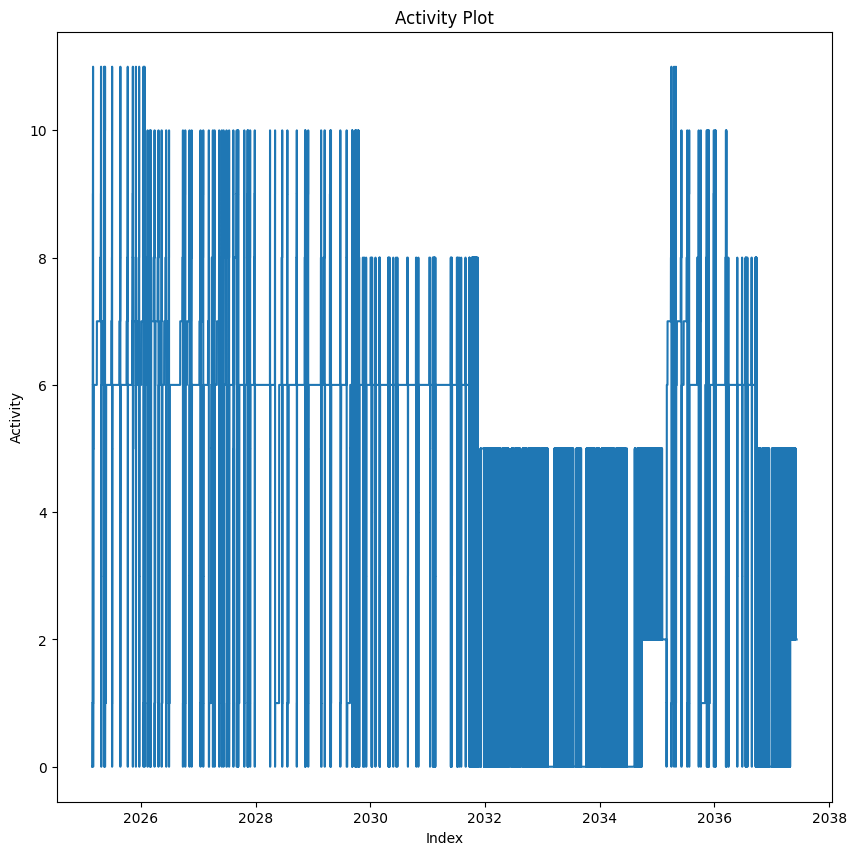

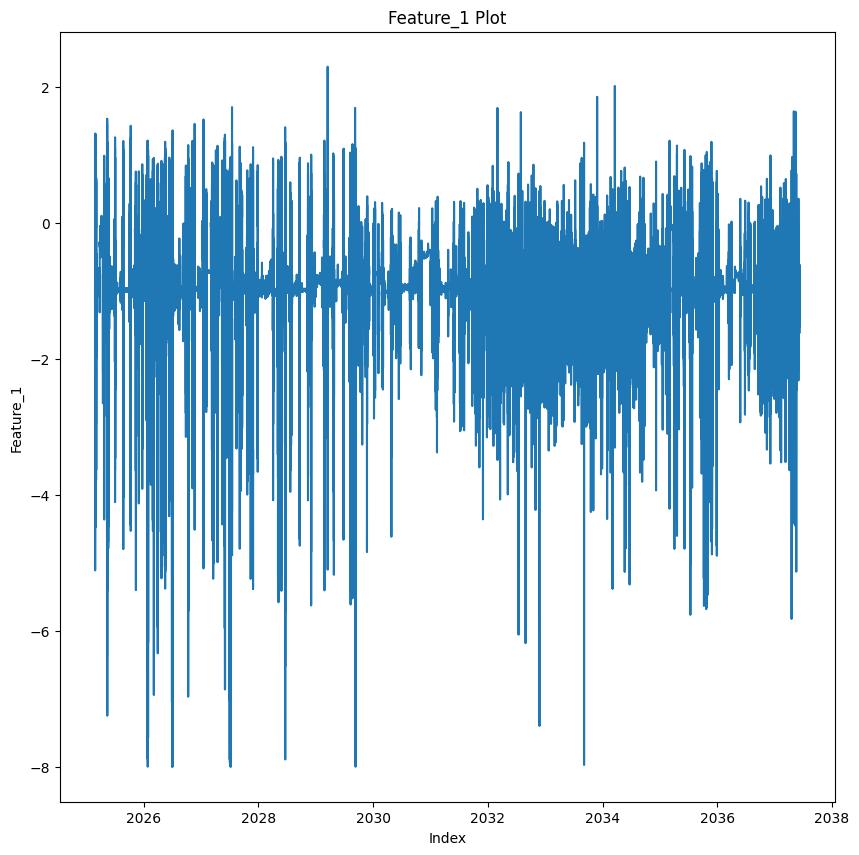

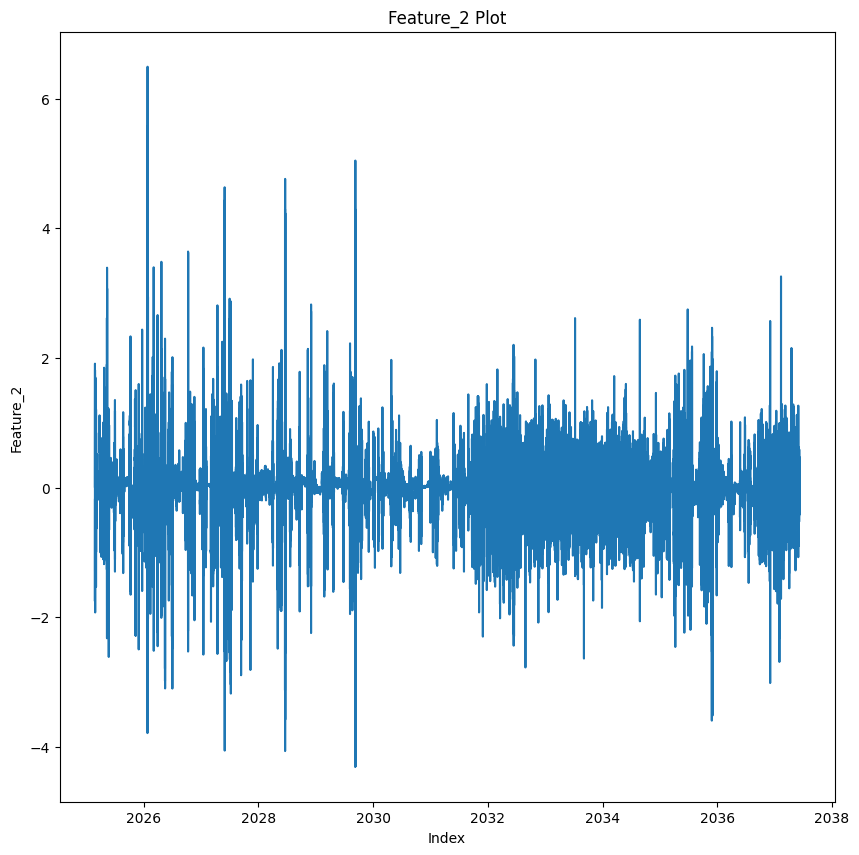

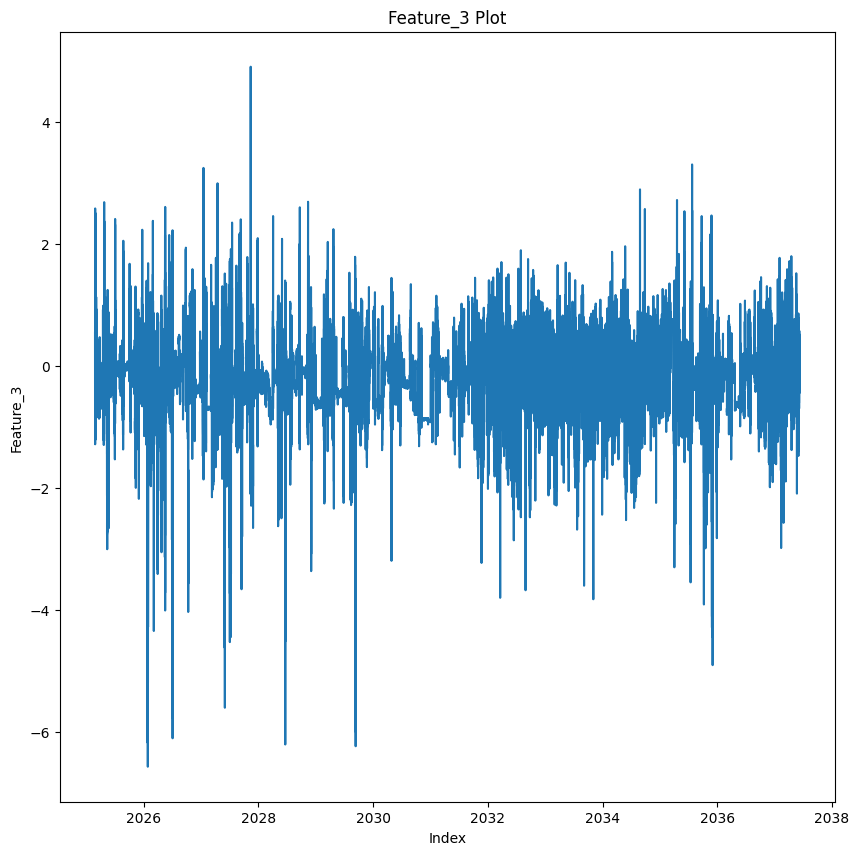

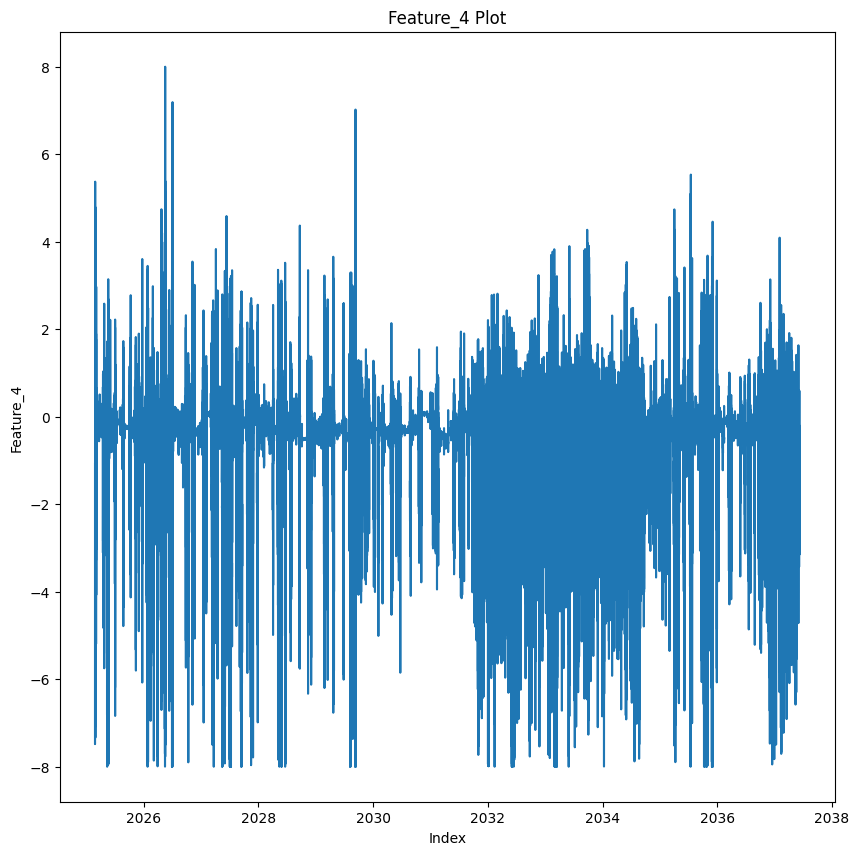

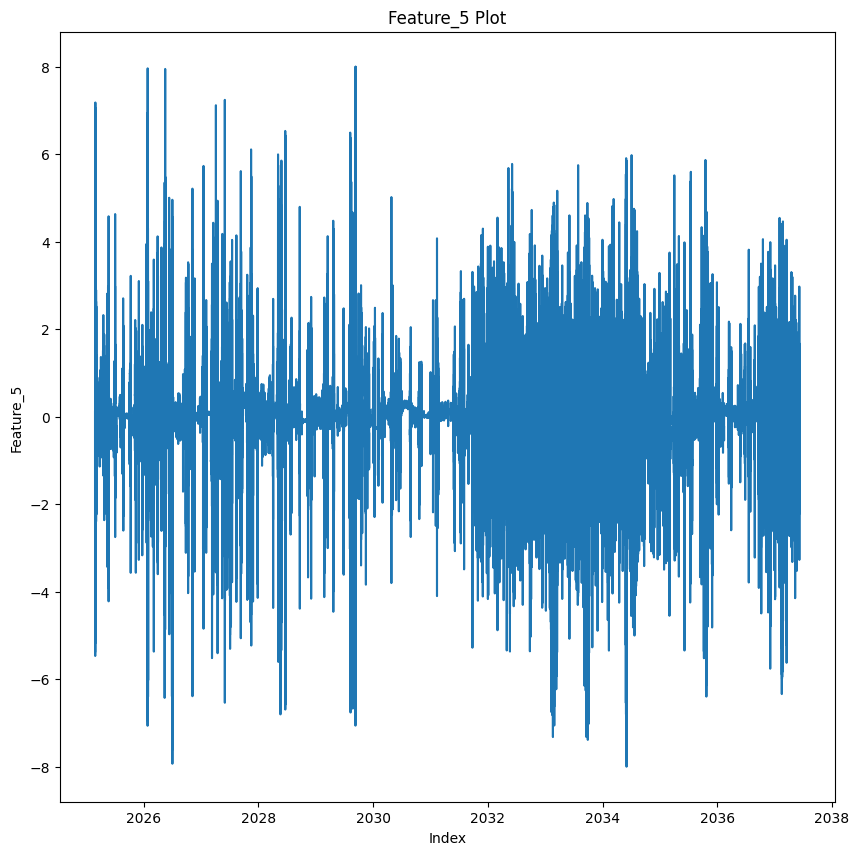

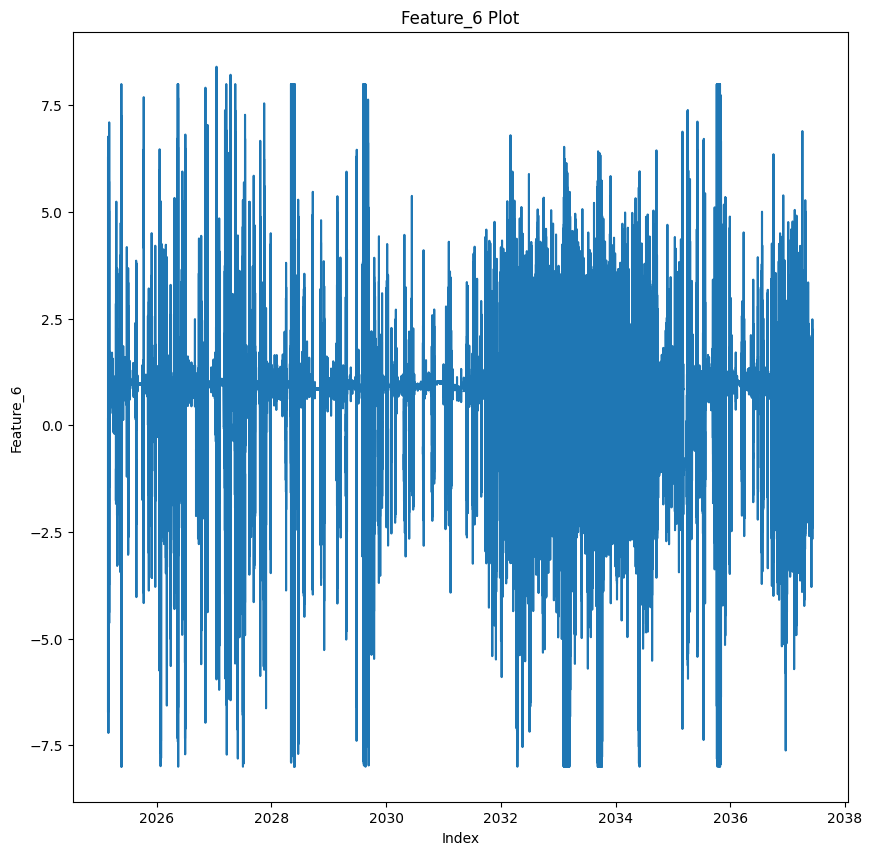

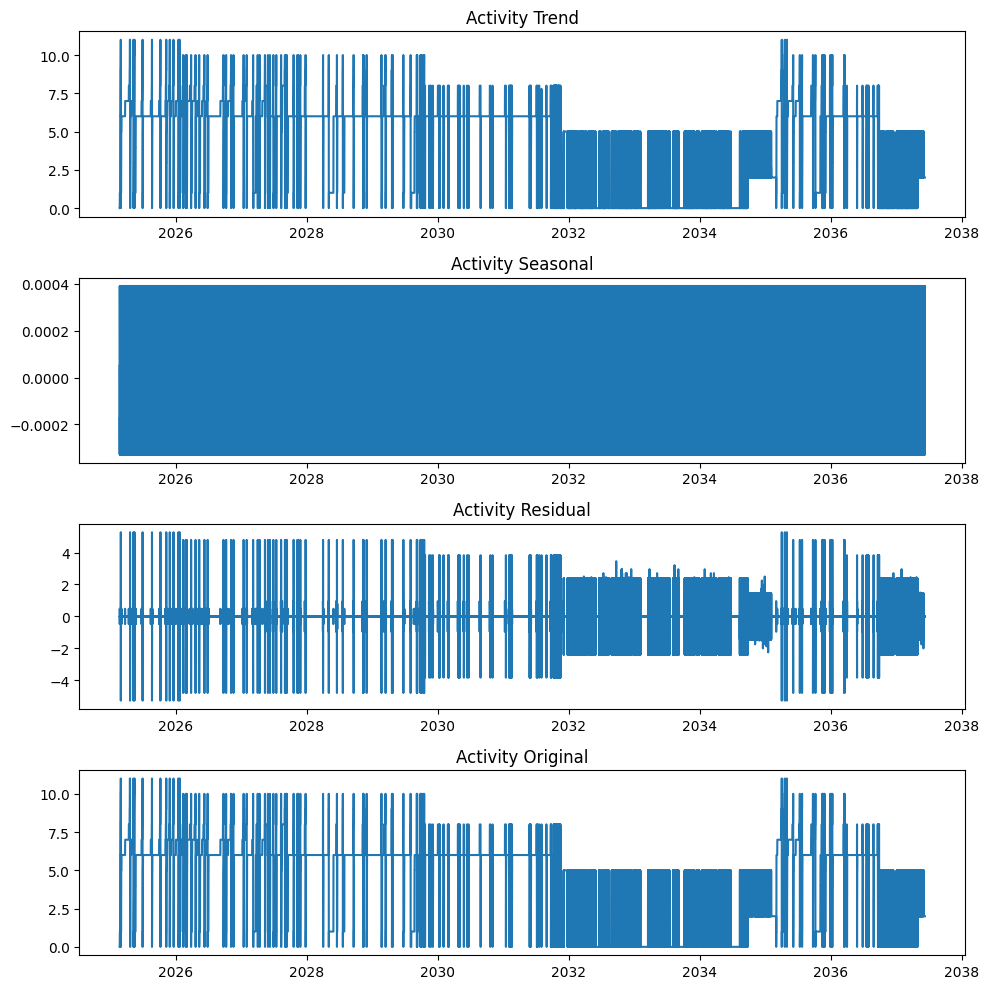

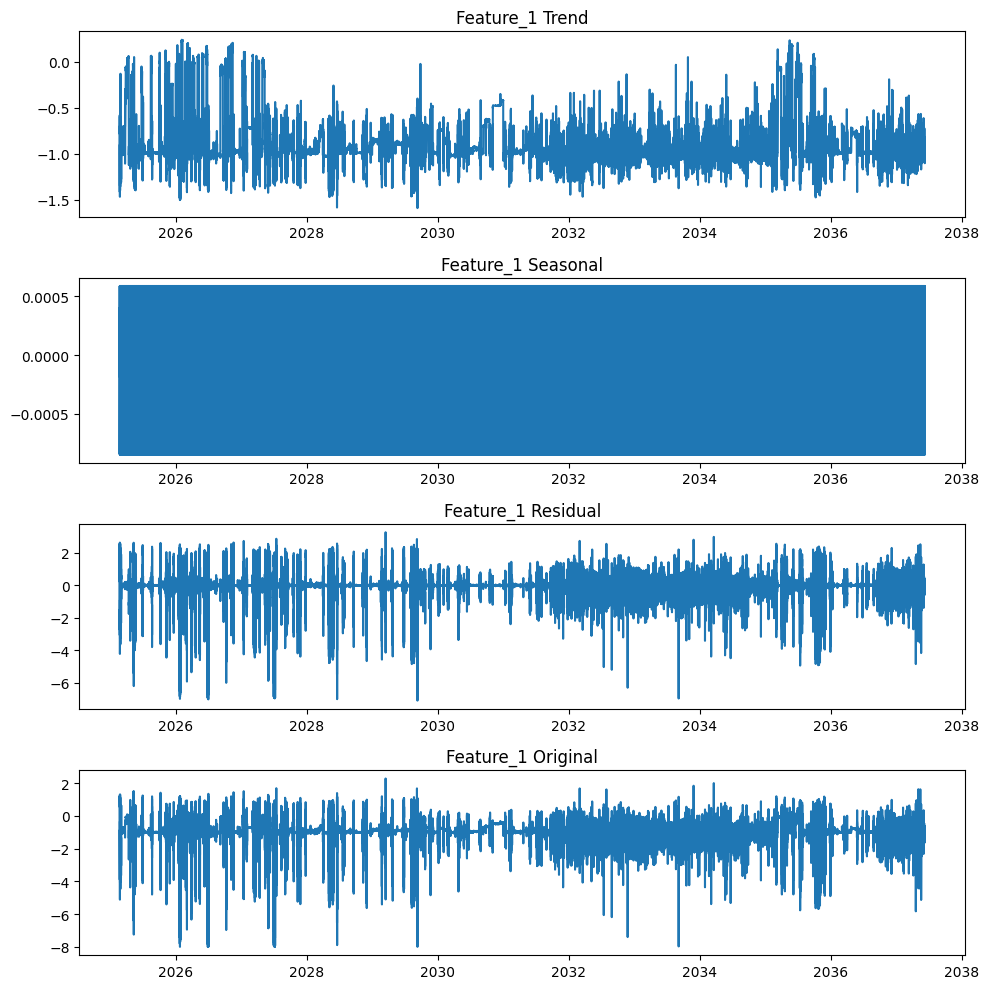

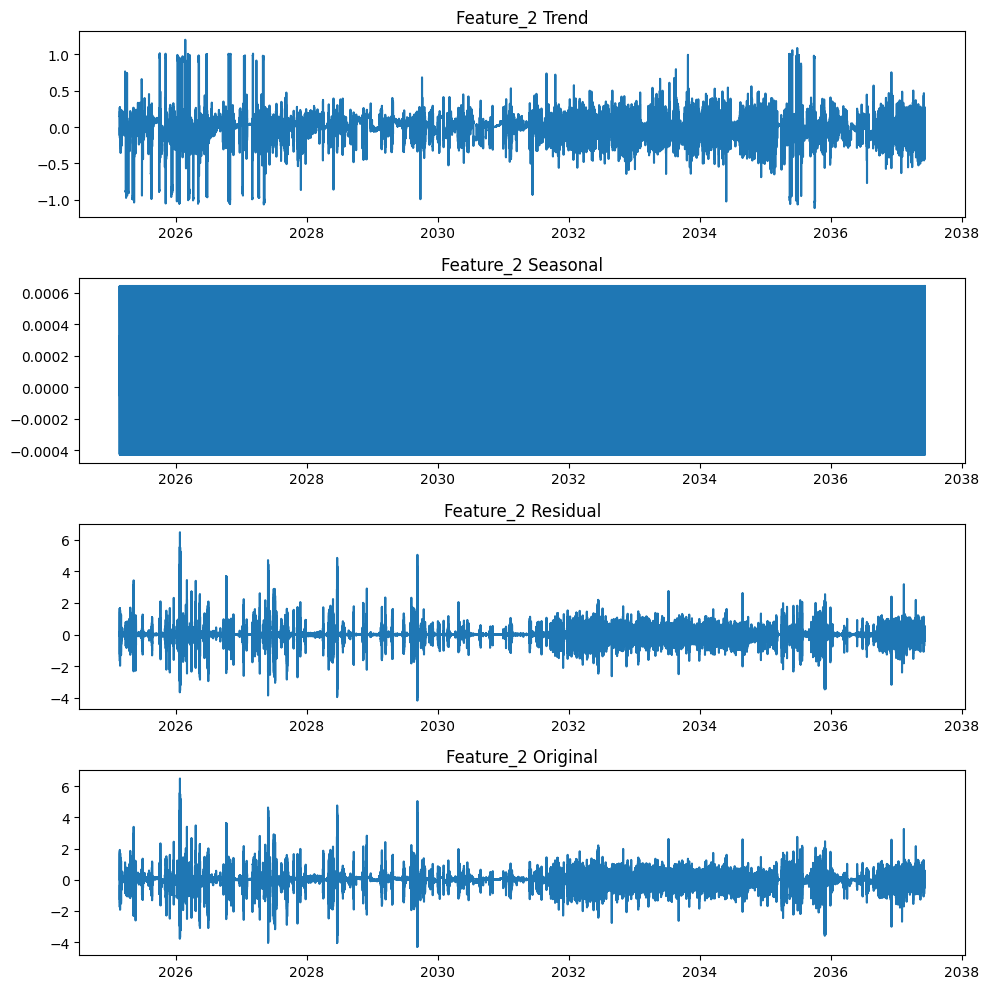

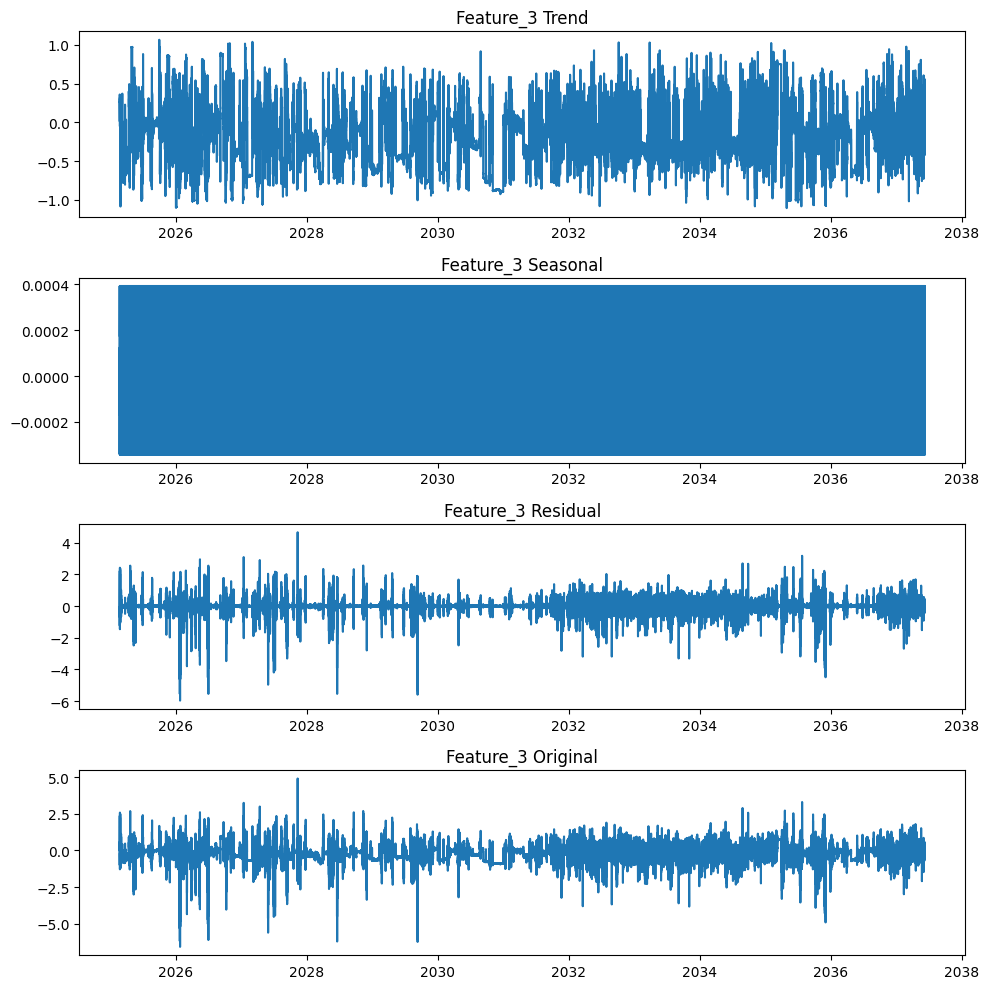

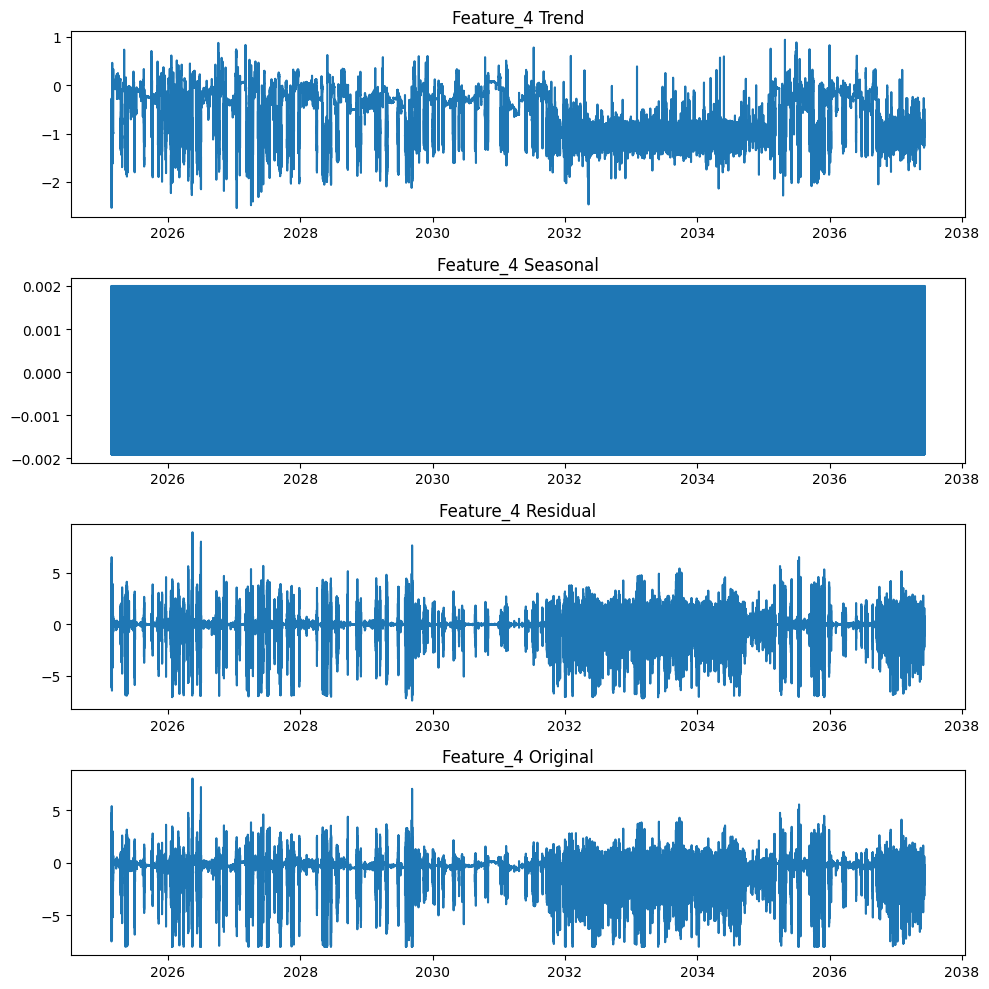

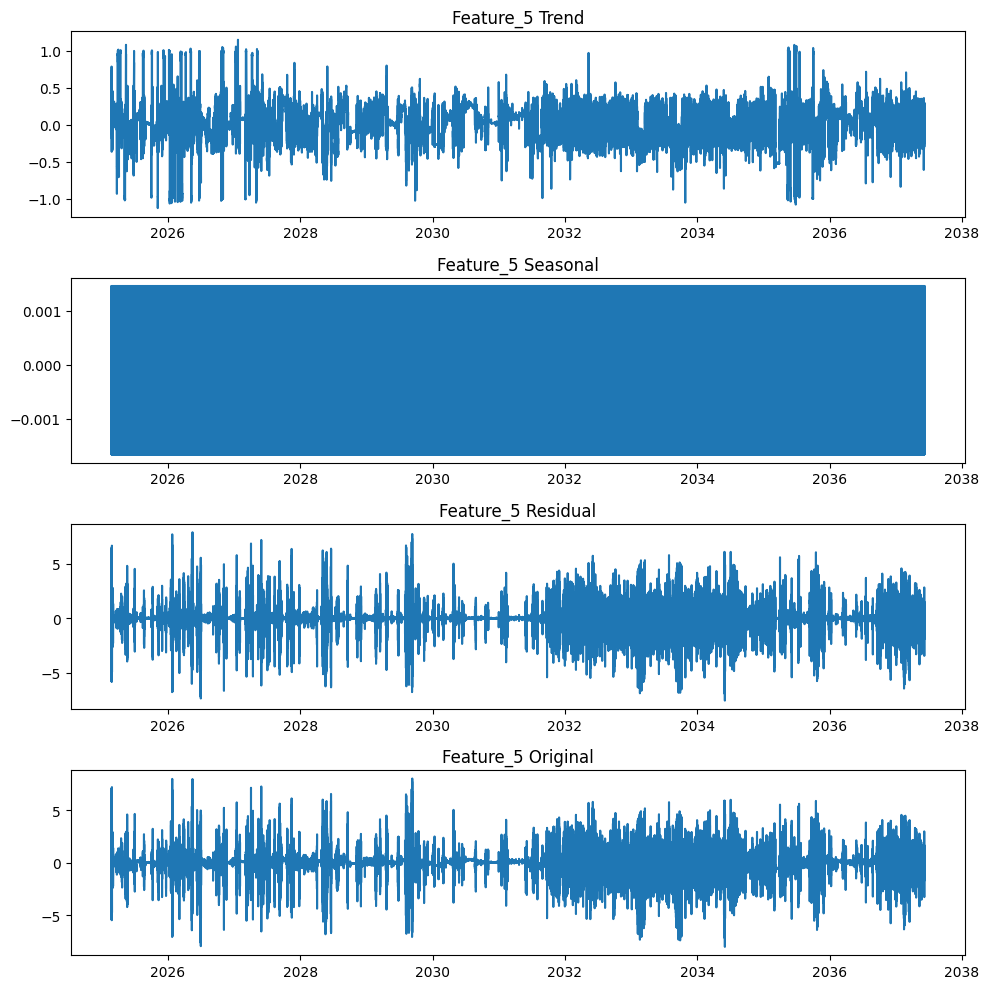

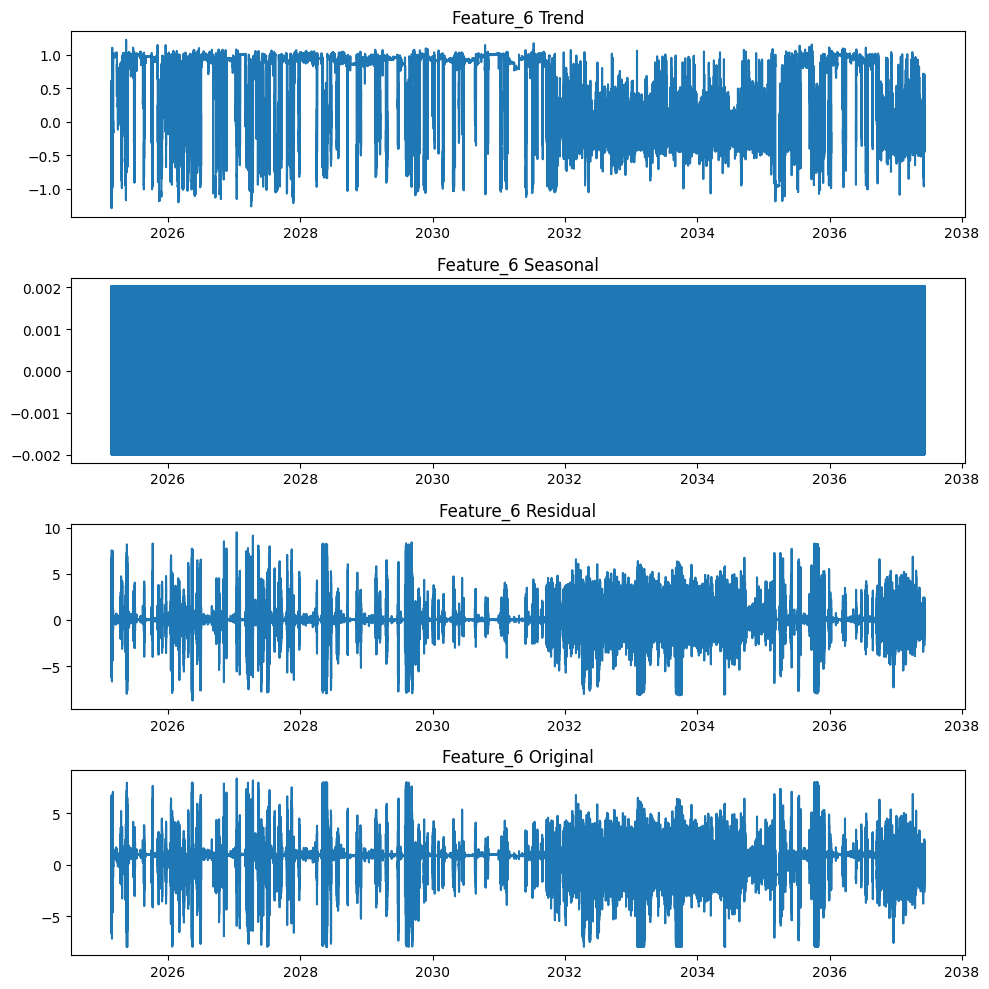

Save Finish


In [7]:
# Adjust period based on data for Decomposition
period = 24
# Plot width 
x_size = 10
# Plot height
y_size = 10
# Set option
# 1.HeatMap, 2.plot, 3.Decomposition, 4.All 
option = 4

# Set Start Function
Visualize_EDA(df, period, x_size, y_size, option)

## Check Statistical_Test

In [ ]:
# Check ADF Test
adf_test(df)


adf_test for column: Activity
ADF Statistic: -1.5757213170184876
p-value: 0.49577695752302325
Critical Values: {'1%': -3.4310041633725734, '5%': -2.861829101294412, '10%': -2.566923883481157}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: Feature_1
ADF Statistic: -3.2212622047722594
p-value: 0.018786459264332755
Critical Values: {'1%': -3.4310066595695945, '5%': -2.861830204343065, '10%': -2.5669244706354584}
The series is stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: Feature_2
ADF Statistic: -6.688918934680363
p-value: 4.15732545236187e-09
Critical Values: {'1%': -3.4310066595695945, '5%': -2.861830204343065, '10%': -2.5669244706354584}
The series is stationary
-----------------------------------------------------------------------------------------------------------

In [ ]:
# Check KPSS Test
kpss_test(df)


kpss_test for column: Activity
KPSS Statistic: 7.079250866707976
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: Feature_1
KPSS Statistic: 2.1837743871660185
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: Feature_2
KPSS Statistic: 5.698889725019929
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: Feature_3
KPSS Statistic: 9.243583992100188
p-value: 0.01
Critical Values: {'10%': 

In [ ]:
# Check PP Test
pp_test(df)


pp_test for column: Activity

Phillips-Perron Test for column: Activity
Test Statistic: -1.58301647185403
p-value: 0.4921190431395321
The series is not stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: Feature_1

Phillips-Perron Test for column: Feature_1
Test Statistic: -22.37032832832654
p-value: 0.0
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: Feature_2

Phillips-Perron Test for column: Feature_2
Test Statistic: -35.595389264046986
p-value: 0.0
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: Feature_3

Phillips-Perron Test for column: Feature_3
Test Statistic: -76.14346904153079
p-value: 0.0
The series is stationary
----------------------------------------------

In [ ]:
# Check ljung box Test
ljung_box_test(df, lags=10)


Ljung-Box Test for column: Activity
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: Feature_1
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: Feature_2
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: Feature_3
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: Feature_4
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: Feature_5
p-value:

In [ ]:
# Check Arch Test
arch_test(df)


arch_test for column: Activity
ARCH Model Results:

Omega (Intercept): 2.07e-04
Alpha[1] (ARCH Term): 1.0000

Model Evaluation:
Log-Likelihood: -1960.57
AIC (Akaike Information Criterion): 3927.14
BIC (Bayesian Information Criterion): 3948.77

Interpretation:
Omega value is low, indicating a low level of volatility in the model.
Alpha[1] is high, suggesting that past variances have a strong effect on current volatility.
------------------------------------------------------------------------------------------------------------------

arch_test for column: Feature_1
ARCH Model Results:

Omega (Intercept): 1.22e-01
Alpha[1] (ARCH Term): 1.0000

Model Evaluation:
Log-Likelihood: -9972.32
AIC (Akaike Information Criterion): 19950.64
BIC (Bayesian Information Criterion): 19972.27

Interpretation:
Omega value is low, indicating a low level of volatility in the model.
Alpha[1] is high, suggesting that past variances have a strong effect on current volatility.
--------------------------------

In [ ]:
# Check VIF Test
vif_test(df)

Variable: const, VIF: 4.26, Interpretation: Low multicollinearity
Variable: Activity, VIF: 2.05, Interpretation: Low multicollinearity
Variable: Feature_1, VIF: 1.75, Interpretation: Low multicollinearity
Variable: Feature_2, VIF: 1.39, Interpretation: Low multicollinearity
Variable: Feature_3, VIF: 2.01, Interpretation: Low multicollinearity
Variable: Feature_4, VIF: 2.12, Interpretation: Low multicollinearity
Variable: Feature_5, VIF: 1.22, Interpretation: Low multicollinearity
Variable: Feature_6, VIF: 1.49, Interpretation: Low multicollinearity
